# Check consistency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.trajectory.inspiral import EMRIInspiral
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.summation.interpolatedmodesum import CubicSplineInterpolant

# set initial parameters
M = 1e6
mu = 1e1
a = 0.9
p0 = 8.0
e0 = 0.0
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

dt = 10.0
T = 1.0


args1=np.array([
    0.05,
])

traj = EMRIInspiral(func="KerrCircFlux")


# run trajectory
import time
start = time.time()
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0,  Phi_phi0, Phi_theta0, Phi_r0, *args1,  T=T, dt=dt)
print('time', time.time()-start)


args=np.array([
    0.0,
])

start = time.time()
t2, p2, e2, Y2, Phi_phi2, Phi_r2, Phi_theta2 = traj(M, mu, a, p0, e0, Y0, Phi_phi0, Phi_theta0, Phi_r0, *args, T=T, dt=dt, upsample=True, new_t=t)
print('time', time.time()-start)

tfinal = np.min([t[-1], t2[-1]])

spl2 = CubicSplineInterpolant(t2, Phi_phi2)
spl1 = CubicSplineInterpolant(t, Phi_phi)

t_new = np.linspace(0,tfinal)

time 0.0013663768768310547
time 0.002737760543823242


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from few.trajectory.inspiral import EMRIInspiral
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.summation.interpolatedmodesum import CubicSplineInterpolant

# set initial parameters
M = 1e6
mu = 1e1
a = 0.0
p0 = 8.0
e0 = 0.4
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

dt = 10.0
T = 1.0


args1=np.array([
    0.01,
])

traj = EMRIInspiral(func="ScalarSchwarzEccFlux")


# run trajectory
import time
start = time.time()
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0,  Phi_phi0, Phi_theta0, Phi_r0, *args1,  T=T, dt=dt)
print('time', time.time()-start)


args=np.array([
    0.0,
])

start = time.time()
t2, p2, e2, Y2, Phi_phi2, Phi_r2, Phi_theta2 = traj(M, mu, a, p0, e0, Y0, Phi_phi0, Phi_theta0, Phi_r0, *args, T=T, dt=dt)#, upsample=True, new_t=t)
print('time', time.time()-start)

tfinal = np.min([t[-1], t2[-1]])

spl2 = CubicSplineInterpolant(t2, Phi_phi2)
spl1 = CubicSplineInterpolant(t, Phi_phi)

t_new = np.linspace(0,tfinal)

time 0.008992910385131836
time 0.008756875991821289


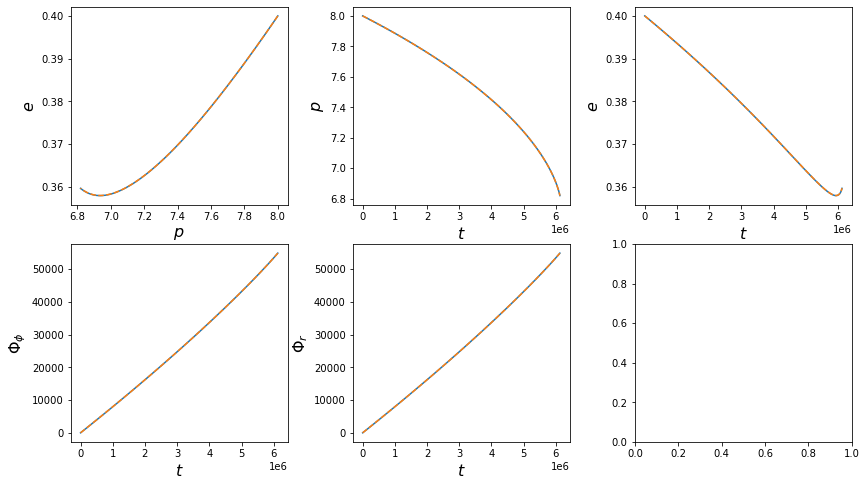

In [3]:
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.3)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_r$', r'Flux']
xlabels = [r'$p$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$', r'$t$']
ys = [e, p, e, Phi_phi, Phi_r]
xs = [p, t, t, t, t]

ys2 = [e2, p2, e2, Phi_phi2, Phi_r2]
xs2 = [p2, t2, t2, t2, t2]

for i, (ax, x, y, x2, y2, xlab, ylab) in enumerate(zip(axes, xs, ys, xs2, ys2, xlabels, ylabels)):
    ax.plot(x, y)
    ax.plot(x2, y2, '--')
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

In [4]:
from few.waveform import Pn5AAKWaveform, AAKWaveformBase, SchwarzschildEccentricWaveformBase, GenerateEMRIWaveform
from few.summation.interpolatedmodesum import CubicSplineInterpolant, InterpolatedModeSum
from few.utils.baseclasses import Pn5AAK, ParallelModuleBase
from few.amplitude.romannet import RomanAmplitude


# set initial parameters
M = 1e6
mu = 1e1
a = 0.0
p0 = 8.0
e0 = 0.4
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

dt = 10.0
T = 0.1
qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False


injection_params = np.array(
    [
        M,
        mu,
        a,
        p0,
        e0,
        Y0,
        dist,
        qS,
        phiS,
        qK,
        phiK,
        Phi_phi0,
        Phi_theta0,
        Phi_r0,
        5e-3
    ]
)

inspiral_kwargs = {
"DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
"max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
"func": "ScalarSchwarzEccFlux"
}

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(
        1e3
    )  # all of the trajectories will be well under len = 1000
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {}

wave_kw = dict(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=True,
)


args = [
EMRIInspiral,
RomanAmplitude,
InterpolatedModeSum,
]


wave = GenerateEMRIWaveform(SchwarzschildEccentricWaveformBase,*args, **wave_kw)

wave1 = wave(*injection_params, dt=dt, T=T).real
print(wave1)

injection_params[-1]=0.0

wave2 = wave(*injection_params,  dt=dt, T=T).real
print(wave2)

4K 84s
   100K .......... .......... .......... .......... ..........  1%  130K 87s
   150K .......... .......... .......... .......... ..........  1%  410K 73s
   200K .......... .......... .......... .......... ..........  1%  824K 61s
   250K .......... .......... .......... .......... ..........  2%  736K 53s
   300K .......... .......... .......... .......... ..........  2% 82.8K 67s
   350K .......... .......... .......... .......... ..........  3% 81.4K 77s
   400K .......... .......... .......... .......... ..........  3%  173K 76s
   450K .......... .......... .......... .......... ..........  3%  232K 73s
   500K .......... .......... .......... .......... ..........  4%  172K 73s
   550K .......... .......... .......... .......... ..........  4%  281K 70s
   600K .......... .......... .......... .......... ..........  5%  263K 68s
   650K .......... .......... .......... .......... ..........  5% 84.2K 73s
   700K .......... .......... .......... .......... ..........  5%  2

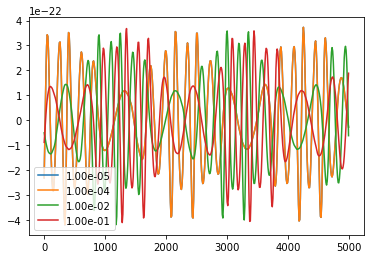

In [9]:

plt.figure()
for q in [1e-5, 1e-4, 1e-2, 1e-1]:
    injection_params[-1] = q
    wave1 = (wave(*injection_params, dt=dt, T=1.0).real).get()[-500:]
    time = np.arange(0,dt*len(wave1),dt)

    plt.plot(time, wave1, label=f'{q:.2e}')

plt.legend()
plt.show()

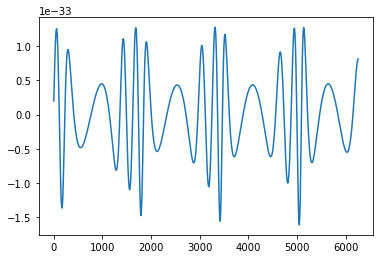

In [18]:
# cp ModifiedFEW/few/files/FluxesEdot_scalar_tensor_1PNnormalized.dat ModifiedFEW/few/files/SSF_ecc_flux_scaled.dat /data/lsperi/miniconda3/envs/scalar_env/lib/python3.7/site-packages/few-1.4.0-py3.7-linux-x86_64.egg/few/trajectory/../../few/files/